<a href="https://colab.research.google.com/github/growhelper/Project_Section1_/blob/main/AI_06_%EA%B9%80%ED%83%9C%EC%9A%B0_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : 게임의 이름입니다.
Platform : 게임이 지원되는 플랫폼의 이름입니다.
Year : 게임이 출시된 연도입니다.
Genre : 게임의 장르입니다.
Publisher : 게임을 제작한 회사입니다.
NA_Sales : 북미지역에서의 출고량입니다.
EU_Sales : 유럽지역에서의 출고량입니다.
JP_Sales : 일본지역에서의 출고량입니다.
Other_Sales : 기타지역에서의 출고량입니다.


**Goal of project**
다음 분기에 어떤 게임을 설계해야 할까
를 정하는 과정과 그 결과를 보여주는 것이 목표입니다.

데이터셋을 읽는 것 부터,
이러한 게임을 만들어야 한다는 결론까지 의 과정을 colab을 사용하여 작성하고,
해당 내용을 기반으로 설명하는 영상을 작성하는 것이
김태우님이 이번 프로젝트 기간 동안 하셔야 하는 일입니다.

당연히 어떠한 코드, 분석, 라이브러리 혹은 목표를 가지는지는 온전히 김태우님의 자유입니다.

그러나, Section 1 Project 인 만큼 해당 기간 동안 배운 내용을 위주로 설정하는 것이 권장됩니다.

추가로, **김태우님의 발표를 듣는 사람은 비데이터 직군이라 가정**합니다.

즉 김태우님의 생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력하셔야 할 겁니다.

Keywords (참조용)
Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
Sprint 2 : Hypothesis Test, CI, Bayesian
Sprint 3 : DR, PCA, Cluster

반드시 들어가야 하는 내용.
**지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답**을 하셔야합니다.
**연도별 게임의 트렌드가 있을까 라는 질문에 대답**을 하셔야합니다.
**출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함**되어야 합니다.
위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

기타
발표영상의 시간은 5분으로 제한합니다.
발표영상 촬영 방법은 다른 문서를 참조하세요.
가능한 코드에 커멘트를 달아주는 것이 권장되지만, 모든 코드 내용을 한줄 한줄 설명할 필요는 없습니다.
단, 내가 이런 분석을 했는데 이 부분은 꼭 설명하고 싶다, 라는 내용이 있으면 설명해도 좋습니다.

In [ ]:
import pandas as pd
import io
from google.colab import files

file_uploaded=files.upload()
df = pd.read_csv(io.StringIO(file_uploaded['vgames2.csv'].decode('utf-8')))
df #df 구현

Saving vgames2.csv to vgames2.csv


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
###전처리 시작###

#결측치가 있는지 확인
pd.DataFrame(df.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Unnamed: 0,0
Name,0
Platform,0
Year,271
Genre,50
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# 결측치 0으로 대체
df.fillna(0,inplace=True)

In [ ]:
# 결측치 제거됬는지 확인
pd.DataFrame(df.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Unnamed: 0,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16598 non-null  float64
 4   Genre        16598 non-null  object 
 5   Publisher    16598 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df.NA_Sales.unique() #유니크로 어떤 값들 때문에 type 변환 안됬는지 확인

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '1.93',
       '0.29', '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51',
       '60K', '0.13', '0.52', '0.34', '0.25', '0.41', '0.22', '0.35',
       '0.1', '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98',
       '0.09', '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23',
       '0.44', '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49',
       '0.62', '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53',
       '0.23', '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31',
       '1.03', '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69',
       '1.25', '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73',
       '0.55', '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44',
       '2.29', '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98',
       '0.75', '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68',
       '

In [ ]:
# 값 바뀌어야 할 컬럼을 리스트에 저장
changes = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]


# 반복문 및 클리닝 사용자 설정 함수 사용

def column_cleaning(col):
  temp_list = []  # 빈 리스트 준비
  
  for i in col:
    if str(i).find("M") != -1 :
      temp = float(i.replace("M", ""))  # m의 경우 다른 값들과 같은 단위이므로 m을 없애고 > Float로 변환합니다.
      temp_list.append(temp)  # 최종 변환한 데이터를 리스트에 추가합니다.
    elif str(i).find("K") != -1 :
      a,b = i.split("K") #k의 경우 다른 값과 동일하게 하기 위하여 1000을 곱한다
      temp = float(float(a)/1000)
      temp_list.append(temp)   
    else :
      temp_list.append(i)
  return temp_list # 함수의 결과로 리스트를 반환

for j in changes:
  df[j] = column_cleaning(df[j])

In [ ]:
df.Other_Sales.unique() #unique 변경 확인

array(['0', '0.01', '0.04', '0.06', '0.15', '0.23', '0.02', '0.21',
       '0.08', '0.05', '0.03', '0.1', 0.0, 0.01, '0.2', '0.9', '0.32',
       '0.07', '0.34', '0.22', '0.37', '0.14', '1.07', '0.25', '0.24',
       '0.16', '0.09', '0.58', 0.03, '0.13', '0.18', '0.12', '0.27',
       '0.77', '0.39', '0.44', '0.26', '1.18', '0.11', '0.72', '0.28',
       '0.19', '1.09', '0.54', 0.06, '1.75', '2.46', '0.31', '0.17',
       '0.33', '1.16', '0.7', 0.05, '0.42', '0.29', '0.41', '0.61',
       '0.57', '1.14', '0.64', '0.43', '0.3', '0.35', '0.66', '0.79',
       '0.4', '2.02', '0.69', '0.73', 0.18, '0.99', 0.04, 0.08, '0.36',
       '1.26', '0.52', '1.73', '0.47', '1.68', '0.48', '1.32', '0.59',
       '8.46', '2.85', '1.23', '0.75', '1.47', '0.49', '0.88', '2.96',
       '2.15', '4.14', '0.53', '0.38', 0.02, '0.46', '0.65', '0.51',
       '1.04', '2.52', '0.78', '1.67', 0.2, '0.68', '1.48', '0.87',
       '1.41', '0.5', '1.78', 0.34, '0.71', '0.63', '0.82', '0.45',
       '1.05', 0.1, '2.1

In [ ]:
import numpy as np #TYPE 변경 시도

df.NA_Sales=df.NA_Sales.astype('float')
df.EU_Sales=df.EU_Sales.astype('float')
df.JP_Sales=df.JP_Sales.astype('float')
df.Other_Sales=df.Other_Sales.astype('float')


In [ ]:
df.info() #Type 변경 완료 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16598 non-null  float64
 4   Genre        16598 non-null  object 
 5   Publisher    16598 non-null  object 
 6   NA_Sales     16598 non-null  float64
 7   EU_Sales     16598 non-null  float64
 8   JP_Sales     16598 non-null  float64
 9   Other_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
df['Total_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [ ]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
df.Platform.unique() # 플랫폼 우선 특이값 발생 없는것으로 확인

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df.Year=df.Year.astype('int') #float형 year를 int형으로 변형

In [ ]:
df.Year.unique() # 연도 특이값 발생 확인

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000,    0, 1984, 1998, 2016, 1985,
       1999,    9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,
         15, 1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8,
       1986,    1,    5,    4,   10,   98,    7,   16,   86,   14,   95,
       2017, 1980, 2020,    2,   13,   12,   94])

In [ ]:
(df['Total_Sales'][df['Year'] < 1900].sum())/df['Total_Sales'].sum() # Year 열 1900 이하값 Total_Sales 비중 확인

0.018058850249835966

In [ ]:
# 비중없으므로 drop, 1.8%
year_drop=df[df['Year'] < 1900].index
df=df.drop(year_drop)

In [ ]:
df.Genre.unique() # 장르 특이값 발생 확인

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', 0], dtype=object)

In [ ]:
(df['Total_Sales'][df['Genre'] == 0].sum())/df['Total_Sales'].sum() # 장르 '0'인 Total_Sales 비중 확인

0.005956705091126737

In [ ]:
# 비중없으므로 drop, 0.6%
genre_drop=df[df['Genre'] == 0].index
df=df.drop(genre_drop)

In [ ]:
df.Publisher.unique()

array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

In [ ]:
(df['Total_Sales'][df['Publisher'] == 0].sum())/df['Total_Sales'].sum() # Publisher '0'인 Total_Sales 비중 확인

0.0009583243801629152

In [ ]:
# 비중없으므로 drop, 0.1%
publisher_drop=df[df['Publisher'] == 0].index
df=df.drop(publisher_drop)

In [ ]:
df=df.iloc[:,1:]

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16137,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16138,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16139,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
###초기 전처리 종료###

In [ ]:
#지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답. 
#각 지역 출고량과 GENRE의 관계를 분석하여 김태우님의 생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 설명
#분석TOOL 선택사유, 분석결과, 이를 통해 결과 대답
#STEP1. 4개 지역 별 GENRE들의 합계를 구한 후 각 지역 정규화 -> STEP2. ANOVA분석 

In [ ]:
#문제에 대한 dataframe 재설정
no1_df=df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
no1_df

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,0.04,0.00,0.00,0.00,0.04
1,Action,0.17,0.00,0.00,0.01,0.18
2,Adventure,0.00,0.00,0.02,0.00,0.02
3,Misc,0.04,0.00,0.00,0.00,0.04
4,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...
16136,Platform,0.15,0.04,0.00,0.01,0.20
16137,Action,0.01,0.00,0.00,0.00,0.01
16138,Sports,0.44,0.19,0.03,0.13,0.79
16139,Action,0.05,0.05,0.25,0.03,0.38


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


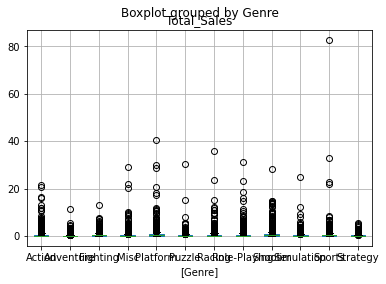

In [ ]:
from matplotlib import pyplot as plt
no1_df.boxplot(column=["Total_Sales"],by=["Genre"])
plt.show()

In [ ]:
Genre_sales_sum=no1_df.groupby(no1_df['Genre']).sum().sort_values(by=["Total_Sales"], ascending=[False])
Genre_sales_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,855.96,512.52,155.73,183.64,1707.85
Sports,664.33,369.69,134.58,131.73,1300.33
Shooter,570.89,307.26,37.34,100.82,1016.31
Role-Playing,307.08,176.31,336.25,54.71,874.35
Platform,442.46,199.40,129.22,51.15,822.23
Misc,394.29,207.68,103.71,72.54,778.22
Racing,353.57,234.20,55.42,76.23,719.42
Fighting,220.11,99.72,86.39,36.10,442.32
Simulation,181.04,112.68,63.46,31.24,388.42


In [ ]:
Genre_sales_sum.rank(ascending=False,method='max')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,1.0,1.0,2.0,1.0,1.0
Sports,2.0,2.0,3.0,2.0,2.0
Shooter,3.0,3.0,12.0,3.0,3.0
Role-Playing,7.0,7.0,1.0,6.0,4.0
Platform,4.0,6.0,4.0,7.0,5.0
Misc,5.0,5.0,5.0,5.0,6.0
Racing,6.0,4.0,9.0,4.0,7.0
Fighting,8.0,9.0,6.0,8.0,8.0
Simulation,9.0,8.0,7.0,9.0,9.0


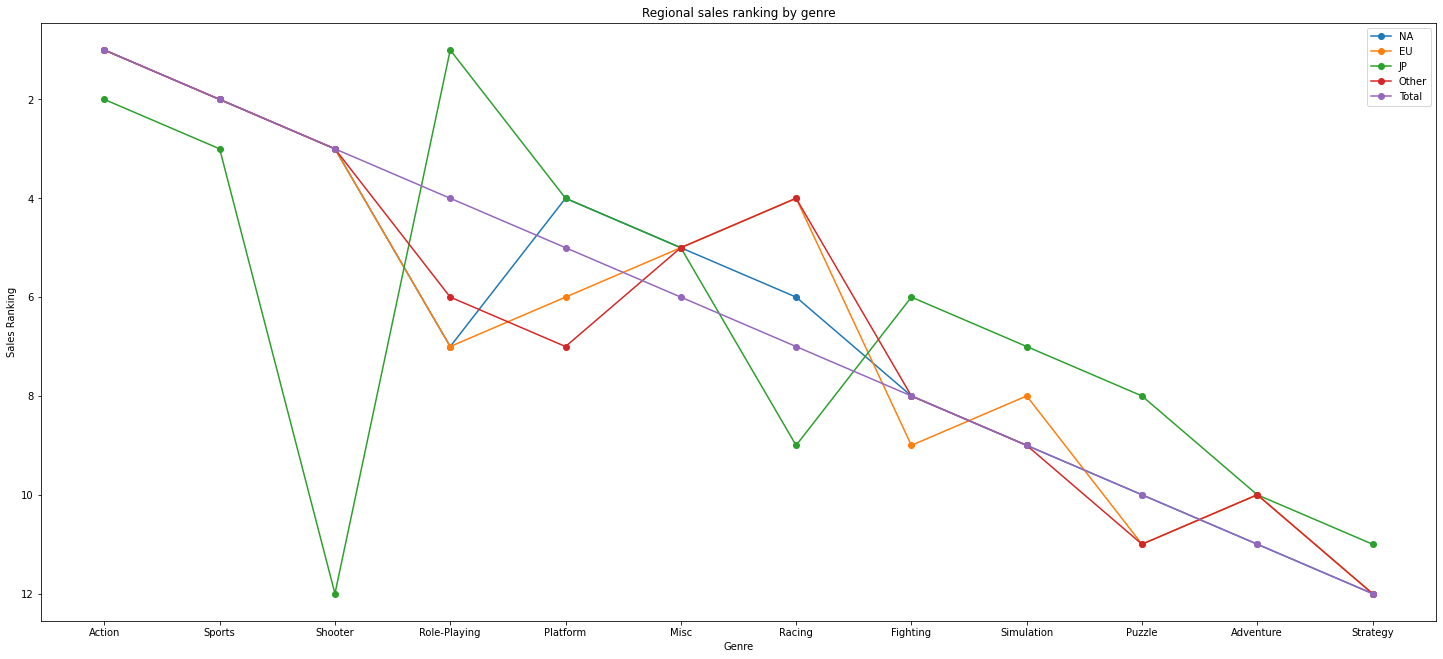

In [ ]:
#rank 데이터는 정성적이기 때문에 선 그래프로 진행시 직관적 해석이 안되는 것 같아 아쉬움

plt.figure(figsize=(25,11))
plt.xlabel('Genres of VGAMES')
plt.ylabel('Sales Rating (out of 12)')

plt.plot(Genre_sales_sum.rank(ascending=False,method='max'), marker='o')
plt.legend(['NA', 'EU','JP','Other','Total'])
plt.gca().invert_yaxis()
plt.xlabel('Genre')
plt.ylabel('Sales Ranking')
plt.title('Regional sales ranking by genre')
plt.show()


<Figure size 432x288 with 0 Axes>

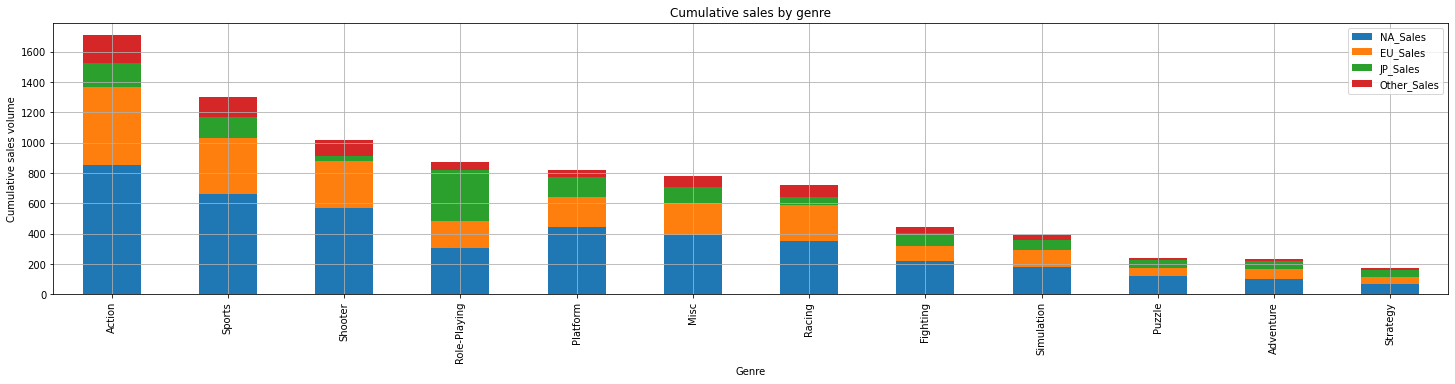

In [ ]:
# 누적 bar
fig = plt.figure();
ax = Genre_sales_sum.iloc[:,:4].plot.bar(stacked=True, figsize=(25, 5))
ax.grid()
ax.legend()
plt.xlabel('Genre')
plt.ylabel('Cumulative sales volume')
plt.title('Cumulative sales by genre')
handles, labels = ax.get_legend_handles_labels()  # extract the legend labels

In [ ]:
#연도별 게임의 트렌드가 있을까 라는 질문에 대답 
#각 YEAR에 GENRE? PLATFORM? PUBLISHER?가 출고량과 선형관계가 있는 것이 있는가
#분석TOOL 선택사유, 분석결과, 이를 통해 결과 대답
#시계열 측면
#특이값 출현과 관련된 guess

In [ ]:
#문제에 대한 dataframe 재설정

#sales 관련
no2_df=df[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
no2_df

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2008,0.04,0.00,0.00,0.00,0.04
1,2009,0.17,0.00,0.00,0.01,0.18
2,2010,0.00,0.00,0.02,0.00,0.02
3,2010,0.04,0.00,0.00,0.00,0.04
4,2010,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...
16136,2006,0.15,0.04,0.00,0.01,0.20
16137,2005,0.01,0.00,0.00,0.00,0.01
16138,2015,0.44,0.19,0.03,0.13,0.79
16139,2013,0.05,0.05,0.25,0.03,0.38


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


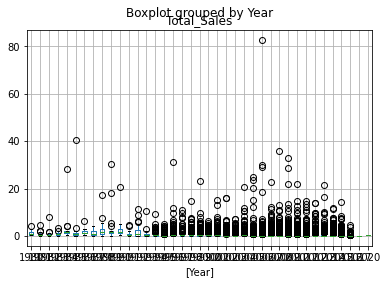

<Figure size 1800x792 with 0 Axes>

In [ ]:
no2_df.boxplot(column=["Total_Sales"],by=["Year"])
plt.figure(figsize=(25,11))
plt.show()

In [ ]:
Year_sales_sum=no2_df.groupby(no2_df['Year']).sum().sort_values(by=["Year"], ascending=[True])
Year_sales_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,,,,,
1980,10.13,0.64,0.00,0.11,10.88
1981,33.40,1.96,0.00,0.32,35.68
1982,26.92,1.65,0.00,0.31,28.88
1983,7.76,0.80,8.10,0.14,16.80
1984,33.28,2.10,14.27,0.70,50.35
1985,33.73,4.74,14.56,0.92,53.95
1986,12.50,2.84,18.76,1.93,36.03
1987,8.46,1.41,11.63,0.20,21.70
1988,23.87,6.59,15.76,0.99,47.21


((array([-2.10568191, -1.71972728, -1.48975533, -1.31922131, -1.18024776,
         -1.06095964, -0.95512439, -0.85903474, -0.77028997, -0.68723531,
         -0.60867329, -0.53370223, -0.46161962, -0.39186133, -0.32396144,
         -0.25752466, -0.19220665, -0.12769937, -0.06371967,  0.        ,
          0.06371967,  0.12769937,  0.19220665,  0.25752466,  0.32396144,
          0.39186133,  0.46161962,  0.53370223,  0.60867329,  0.68723531,
          0.77028997,  0.85903474,  0.95512439,  1.06095964,  1.18024776,
          1.31922131,  1.48975533,  1.71972728,  2.10568191]),
  array([5.0000e-02, 2.9000e-01, 1.0880e+01, 1.6800e+01, 2.1700e+01,
         2.8880e+01, 3.2230e+01, 3.5680e+01, 3.6030e+01, 4.5990e+01,
         4.7210e+01, 4.9370e+01, 5.0350e+01, 5.3950e+01, 6.6350e+01,
         7.3450e+01, 7.6140e+01, 7.9200e+01, 8.6680e+01, 1.9698e+02,
         2.0070e+02, 2.0123e+02, 2.4916e+02, 2.5363e+02, 2.6158e+02,
         3.2634e+02, 3.3432e+02, 3.5208e+02, 3.5342e+02, 3.6130e+02,
     

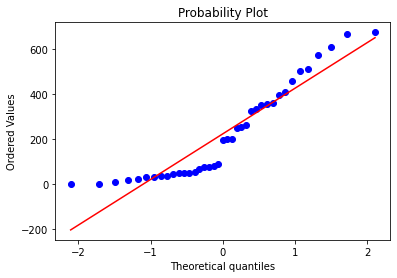

In [ ]:
import scipy.stats as stats

stats.probplot(Year_sales_sum['Total_Sales'], plot=plt)

In [ ]:
# 출고량 특이점 분석

temp=[]
temp.append(0) #1980년은 성장율 0%으로 설정

for i in range(37): #18,19년은 수치 누락되어 있으므로 20년은 성장율 표기 하지 않기로 함
  tmp=Year_sales_sum.loc[1980+i+1,'Total_Sales']/Year_sales_sum.loc[1980+i,'Total_Sales']
  temp.append(tmp)

temp

[0,
 3.2794117647058827,
 0.8094170403587445,
 0.5817174515235454,
 2.9970238095238106,
 1.0714995034756702,
 0.6678405931417978,
 0.6022758812101029,
 2.1755760368663593,
 1.5558144460919294,
 0.6721579305650103,
 0.6528256025926679,
 2.36239528389699,
 0.6040189125295506,
 1.7221135029354215,
 1.0944444444444432,
 2.2724965389940026,
 1.018885166006701,
 1.2637269556552075,
 0.9823759019043489,
 0.8076336490608441,
 1.621726382746111,
 1.2069007783293488,
 0.8939216980653025,
 1.1583162917518746,
 1.1192928252660488,
 1.1185181939667432,
 1.1911197289304105,
 1.1086738469127675,
 0.9858507356430953,
 0.8624040920716112,
 0.8780441002023597,
 0.7178193233067758,
 0.9781898699141997,
 0.9459566521419287,
 0.7824240248863367,
 0.25365089074088254,
 0.0007535795026375275]

In [ ]:

# year와 장르간의 연관성 

cross_chi2  = df[['Genre', 'Year','Total_Sales']]

cross_chi2 = pd.crosstab(cross_chi2['Genre'], cross_chi2['Year'])

p_value_chi2 = stats.chi2_contingency(cross_chi2, correction = False)[1]

if p_value_chi2 >= 0.05:
    print('Chi2 검정 P-value=',p_value_chi2,'->Genre와 Year 사이의 연관성이 존재한다.')
else:
    print('Chi2 검정 P-value=',p_value_chi2,'->Genre와 Year 사이의 연관성이 존재하지 않는다.')

Chi2 검정 P-value= 0.0 ->Genre와 Year 사이의 연관성이 존재하지 않는다.


In [ ]:

# 장르와 플랫폼간의 연관성 

cross_chi2_2  = df[['Genre', 'Platform','Total_Sales']]

cross_chi2_2= pd.crosstab(cross_chi2_2['Genre'], cross_chi2_2['Platform'])

p_value_chi2_2= stats.chi2_contingency(cross_chi2_2, correction = False)[1]

if p_value_chi2_2 >= 0.05:
    print('Chi2 검정 P-value=',p_value_chi2_2,'->Genre와 Platform 사이의 연관성이 존재한다.')
else:
    print('Chi2 검정 P-value=',p_value_chi2_2,'->Genre와 Platform 사이의 연관성이 존재하지 않는다.')

Chi2 검정 P-value= 0.0 ->Genre와 Platform 사이의 연관성이 존재하지 않는다.


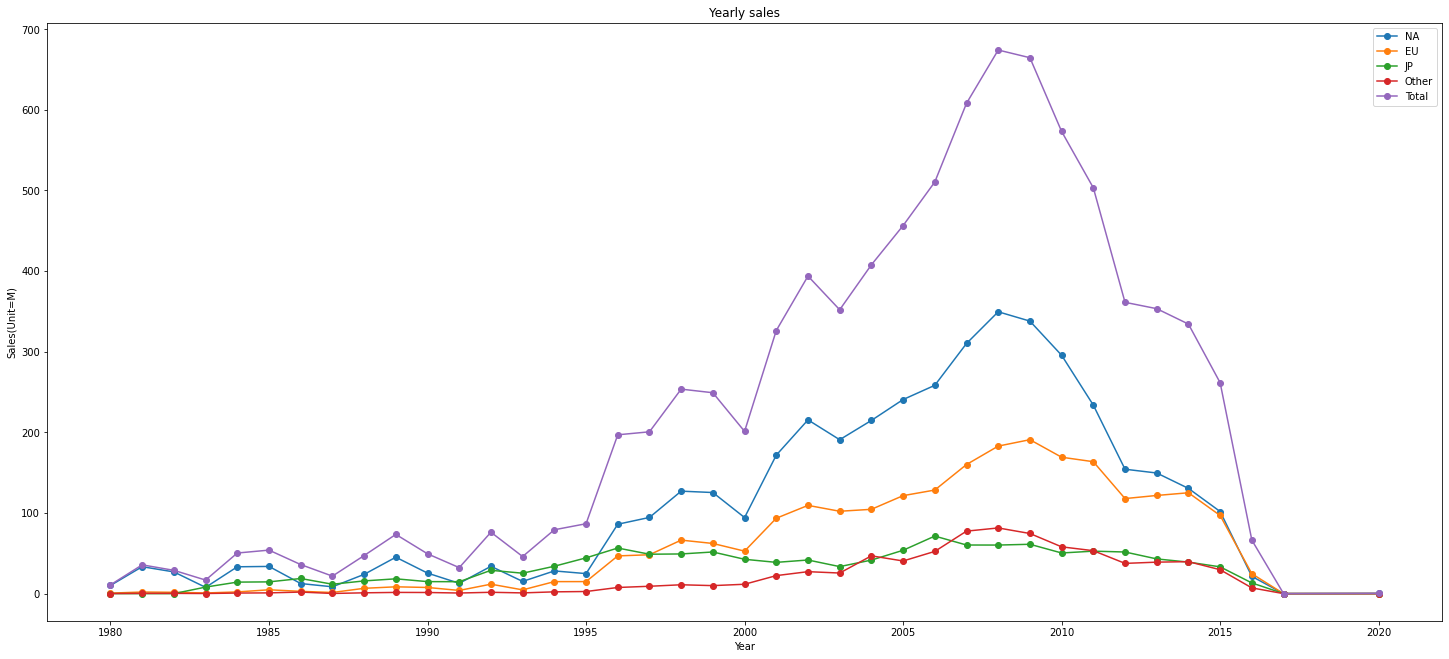

In [ ]:
# 선 그래프로 추이 보기_sales
plt.figure(figsize=(25,11))
plt.xlabel('Year')
plt.ylabel('Sales(Unit=M)')

plt.plot(Year_sales_sum, marker='o')
plt.legend(['NA', 'EU','JP','Other','Total'])
plt.title('Yearly sales')
plt.show()

In [ ]:
Year_sales_sum_amend=Year_sales_sum.reset_index()
Year_sales_sum_amend

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980,10.13,0.64,0.00,0.11,10.88
1,1981,33.40,1.96,0.00,0.32,35.68
2,1982,26.92,1.65,0.00,0.31,28.88
3,1983,7.76,0.80,8.10,0.14,16.80
4,1984,33.28,2.10,14.27,0.70,50.35
5,1985,33.73,4.74,14.56,0.92,53.95
6,1986,12.50,2.84,18.76,1.93,36.03
7,1987,8.46,1.41,11.63,0.20,21.70
8,1988,23.87,6.59,15.76,0.99,47.21
9,1989,45.15,8.44,18.36,1.50,73.45


In [ ]:
#트렌드 분석하기 위한 연도 분할
Year_sales_sum_amend['Division']=np.where((Year_sales_sum_amend['Year'] < 1996), 'Before 1996',0) 
Year_sales_sum_amend['Division'][((Year_sales_sum_amend['Year'] >= 1996) & (Year_sales_sum_amend['Year'] < 2001))] = 'Step 1' 
Year_sales_sum_amend['Division'][((Year_sales_sum_amend['Year'] >= 2001) & (Year_sales_sum_amend['Year'] < 2006))] = 'Step 2' 
Year_sales_sum_amend['Division'][((Year_sales_sum_amend['Year'] >= 2006) & (Year_sales_sum_amend['Year'] < 2011))] = 'Step 3' 
Year_sales_sum_amend['Division'][(Year_sales_sum_amend['Year'] >= 2011)] = 'Step 4' 
Year_sales_sum_amend
Year_sales_sum_amend.iloc[:,1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Division
0,10.13,0.64,0.00,0.11,10.88,Before 1996
1,33.40,1.96,0.00,0.32,35.68,Before 1996
2,26.92,1.65,0.00,0.31,28.88,Before 1996
3,7.76,0.80,8.10,0.14,16.80,Before 1996
4,33.28,2.10,14.27,0.70,50.35,Before 1996
5,33.73,4.74,14.56,0.92,53.95,Before 1996
6,12.50,2.84,18.76,1.93,36.03,Before 1996
7,8.46,1.41,11.63,0.20,21.70,Before 1996
8,23.87,6.59,15.76,0.99,47.21,Before 1996
9,45.15,8.44,18.36,1.50,73.45,Before 1996


In [ ]:
Division_sum=Year_sales_sum_amend.iloc[:,1:].groupby(Year_sales_sum_amend.iloc[:,1:]['Division']).sum()
Division_sum=Division_sum.reset_index()
Division_sum

,Division,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Before 1996,375.38,88.89,263.66,16.61,744.54
1,Step 1,527.38,276.25,248.83,49.24,1101.70
2,Step 2,1033.64,531.18,209.32,162.43,1936.57
3,Step 3,1551.84,831.65,303.49,343.92,3030.90
4,Step 4,791.64,649.90,232.91,206.19,1880.64


In [ ]:
Division_sum[['Division','Total_Sales']]

,Division,Total_Sales
0,Before 1996,744.54
1,Step 1,1101.70
2,Step 2,1936.57
3,Step 3,3030.90
4,Step 4,1880.64


In [ ]:
genre_trend=df['Total_Sales'].groupby([df['Year'],df['Genre']]).sum()
genre_trend=genre_trend.reset_index()
genre_trend

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
383,2016,Sports,14.46
384,2016,Strategy,0.52
385,2017,Action,0.01
386,2017,Role-Playing,0.04


In [ ]:
genre_trend['Division']=np.where(genre_trend['Year'] < 1996, 'Before 1996',0) 
genre_trend['Division'][((genre_trend['Year'] >= 1996) & (genre_trend['Year'] < 2001))] = 'Step 1' 
genre_trend['Division'][((genre_trend['Year'] >= 2001) & (genre_trend['Year'] < 2006))] = 'Step 2' 
genre_trend['Division'][((genre_trend['Year'] >= 2006) & (genre_trend['Year'] < 2011))] = 'Step 3' 
genre_trend['Division'][(genre_trend['Year'] >= 2011)] = 'Step 4' 
genre_trend

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Year,Genre,Total_Sales,Division
0,1980,Action,0.34,Before 1996
1,1980,Fighting,0.77,Before 1996
2,1980,Misc,2.70,Before 1996
3,1980,Shooter,7.07,Before 1996
4,1981,Action,14.79,Before 1996
...,...,...,...,...
383,2016,Sports,14.46,Step 4
384,2016,Strategy,0.52,Step 4
385,2017,Action,0.01,Step 4
386,2017,Role-Playing,0.04,Step 4


In [ ]:
genre_trend2=genre_trend['Total_Sales'].groupby([genre_trend['Division'],genre_trend['Genre']]).sum()
genre_trend2=genre_trend2.reset_index()
genre_trend2

,Division,Genre,Total_Sales
0,Before 1996,Action,74.58
1,Before 1996,Adventure,23.78
2,Before 1996,Fighting,54.62
3,Before 1996,Misc,23.01
4,Before 1996,Platform,229.36
5,Before 1996,Puzzle,84.21
6,Before 1996,Racing,37.17
7,Before 1996,Role-Playing,56.88
8,Before 1996,Shooter,76.95
9,Before 1996,Simulation,13.01


In [ ]:
genre_trend3 = pd.merge(genre_trend2, Division_sum[['Division','Total_Sales']],on='Division')
genre_trend3

,Division,Genre,Total_Sales_x,Total_Sales_y
0,Before 1996,Action,74.58,744.54
1,Before 1996,Adventure,23.78,744.54
2,Before 1996,Fighting,54.62,744.54
3,Before 1996,Misc,23.01,744.54
4,Before 1996,Platform,229.36,744.54
5,Before 1996,Puzzle,84.21,744.54
6,Before 1996,Racing,37.17,744.54
7,Before 1996,Role-Playing,56.88,744.54
8,Before 1996,Shooter,76.95,744.54
9,Before 1996,Simulation,13.01,744.54


In [ ]:
genre_trend3['Weight']=round((genre_trend3['Total_Sales_x'] / genre_trend3['Total_Sales_y'])*100,1)
genre_trend3 

,Division,Genre,Total_Sales_x,Total_Sales_y,Weight
0,Before 1996,Action,74.58,744.54,10.0
1,Before 1996,Adventure,23.78,744.54,3.2
2,Before 1996,Fighting,54.62,744.54,7.3
3,Before 1996,Misc,23.01,744.54,3.1
4,Before 1996,Platform,229.36,744.54,30.8
5,Before 1996,Puzzle,84.21,744.54,11.3
6,Before 1996,Racing,37.17,744.54,5.0
7,Before 1996,Role-Playing,56.88,744.54,7.6
8,Before 1996,Shooter,76.95,744.54,10.3
9,Before 1996,Simulation,13.01,744.54,1.7


In [ ]:
#풀랫폼 트렌드 데이터 프레임 생성
platform_trend=df['Total_Sales'].groupby([df['Year'],df['Platform']]).sum()
platform_trend=platform_trend.reset_index()
platform_trend

,Year,Platform,Total_Sales
0,1980,2600,10.88
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96
...,...,...,...
236,2016,X360,0.83
237,2016,XOne,12.38
238,2017,PS4,0.03
239,2017,PSV,0.02


In [ ]:
platform_trend['Division']=np.where(platform_trend['Year'] < 1996, 'Before 1996',0) 
platform_trend['Division'][((platform_trend['Year'] >= 1996) & (platform_trend['Year'] < 2001))] = 'Step 1' 
platform_trend['Division'][((platform_trend['Year'] >= 2001) & (platform_trend['Year'] < 2006))] = 'Step 2' 
platform_trend['Division'][((platform_trend['Year'] >= 2006) & (platform_trend['Year'] < 2011))] = 'Step 3' 
platform_trend['Division'][(platform_trend['Year'] >= 2011)] = 'Step 4' 
platform_trend

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Year,Platform,Total_Sales,Division
0,1980,2600,10.88,Before 1996
1,1981,2600,35.68,Before 1996
2,1982,2600,28.88,Before 1996
3,1983,2600,5.84,Before 1996
4,1983,NES,10.96,Before 1996
...,...,...,...,...
236,2016,X360,0.83,Step 4
237,2016,XOne,12.38,Step 4
238,2017,PS4,0.03,Step 4
239,2017,PSV,0.02,Step 4


In [ ]:
platform_trend2=platform_trend['Total_Sales'].groupby([platform_trend['Division'],platform_trend['Platform']]).sum()
platform_trend2=platform_trend2.reset_index()
platform_trend2

,Division,Platform,Total_Sales
0,Before 1996,2600,85.98
1,Before 1996,3DO,0.10
2,Before 1996,DS,0.02
3,Before 1996,GB,118.13
4,Before 1996,GEN,28.35
...,...,...,...
58,Step 4,PSV,60.85
59,Step 4,Wii,99.87
60,Step 4,WiiU,81.79
61,Step 4,X360,374.85


In [ ]:
platform_trend3 = pd.merge(platform_trend2, Division_sum[['Division','Total_Sales']],on='Division')
platform_trend3

,Division,Platform,Total_Sales_x,Total_Sales_y
0,Before 1996,2600,85.98,744.54
1,Before 1996,3DO,0.10,744.54
2,Before 1996,DS,0.02,744.54
3,Before 1996,GB,118.13,744.54
4,Before 1996,GEN,28.35,744.54
...,...,...,...,...
58,Step 4,PSV,60.85,1880.64
59,Step 4,Wii,99.87,1880.64
60,Step 4,WiiU,81.79,1880.64
61,Step 4,X360,374.85,1880.64


In [ ]:
platform_trend3['Weight']=round((platform_trend3['Total_Sales_x'] / platform_trend3['Total_Sales_y'])*100,1)
platform_trend3

,Division,Platform,Total_Sales_x,Total_Sales_y,Weight
0,Before 1996,2600,85.98,744.54,11.5
1,Before 1996,3DO,0.10,744.54,0.0
2,Before 1996,DS,0.02,744.54,0.0
3,Before 1996,GB,118.13,744.54,15.9
4,Before 1996,GEN,28.35,744.54,3.8
...,...,...,...,...,...
58,Step 4,PSV,60.85,1880.64,3.2
59,Step 4,Wii,99.87,1880.64,5.3
60,Step 4,WiiU,81.79,1880.64,4.3
61,Step 4,X360,374.85,1880.64,19.9


In [ ]:
#5개 연도 클러스터에 대한 비중 대로 sort
Before_1996=genre_trend3[genre_trend3['Division']=='Before 1996'].sort_values(by=["Weight"], ascending=[False])
Step_1=genre_trend3[genre_trend3['Division']=='Step 1'].sort_values(by=["Weight"], ascending=[False])
Step_2=genre_trend3[genre_trend3['Division']=='Step 2'].sort_values(by=["Weight"], ascending=[False])
Step_3=genre_trend3[genre_trend3['Division']=='Step 3'].sort_values(by=["Weight"], ascending=[False])
Step_4=genre_trend3[genre_trend3['Division']=='Step 4'].sort_values(by=["Weight"], ascending=[False])

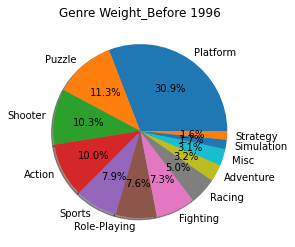

In [ ]:
#파이 차트 그리기 	Before 1996

labels = Before_1996['Genre']
ratio = Before_1996['Weight']



plt.pie(ratio, labels=labels, shadow=True, autopct='%.1f%%')
plt.title('Genre Weight_Before 1996')
plt.show()

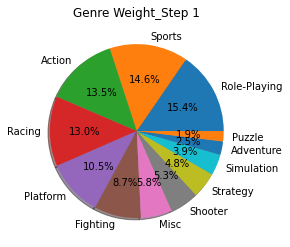

In [ ]:
#파이 차트 그리기 	Step 1

labels = Step_1['Genre']
ratio = Step_1['Weight']
plt.pie(ratio, labels=labels, shadow=True,autopct='%.1f%%')
plt.title('Genre Weight_Step 1')
plt.show()

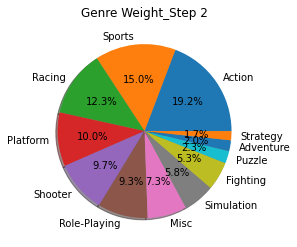

In [ ]:
#파이 차트 그리기 	Step 2

labels = Step_2['Genre']
ratio = Step_2['Weight']

plt.pie(ratio, labels=labels, shadow=True,autopct='%.1f%%')
plt.title('Genre Weight_Step 2')
plt.show()

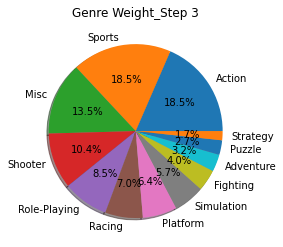

In [ ]:
#파이 차트 그리기 	Step 3

labels = Step_3['Genre']
ratio = Step_3['Weight']

plt.pie(ratio, labels=labels, shadow=True,autopct='%.1f%%')
plt.title('Genre Weight_Step 3')
plt.show()

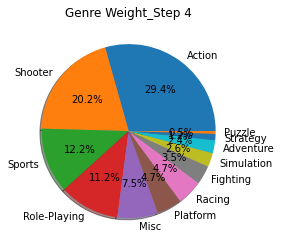

In [ ]:
#파이 차트 그리기 	Step 4

labels = Step_4['Genre']
ratio = Step_4['Weight']

plt.pie(ratio, labels=labels, shadow=True,autopct='%.1f%%')
plt.title('Genre Weight_Step 4')
plt.show()

In [ ]:
# 트렌드 이끄는 5순위들의 신장율
diff_growth_step1=pd.merge(Step_1.head(5),Before_1996[['Genre','Weight']],on='Genre')
diff_growth_step2=pd.merge(Step_2.head(5),Step_1[['Genre','Weight']],on='Genre')
diff_growth_step3=pd.merge(Step_3.head(5),Step_2[['Genre','Weight']],on='Genre')
diff_growth_step4=pd.merge(Step_4.head(5),Step_3[['Genre','Weight']],on='Genre')

In [ ]:
diff_growth_step1['Growth Rate(%)']=round(((diff_growth_step1['Weight_x']/diff_growth_step1['Weight_y'])-1)*100,1)
diff_growth_step2['Growth Rate(%)']=round(((diff_growth_step2['Weight_x']/diff_growth_step2['Weight_y'])-1)*100,1)
diff_growth_step3['Growth Rate(%)']=round(((diff_growth_step3['Weight_x']/diff_growth_step3['Weight_y'])-1)*100,1)
diff_growth_step4['Growth Rate(%)']=round(((diff_growth_step4['Weight_x']/diff_growth_step4['Weight_y'])-1)*100,1)

In [ ]:
diff_growth_step1['Rank']=[1,2,3,4,5]
diff_growth_step1[['Rank','Genre','Growth Rate(%)']]

,Rank,Genre,Growth Rate(%)
0,1,Role-Playing,102.6
1,2,Sports,84.8
2,3,Action,35.0
3,4,Racing,160.0
4,5,Platform,-65.9


In [ ]:
diff_growth_step2['Rank']=[1,2,3,4,5]
diff_growth_step2[['Rank','Genre','Growth Rate(%)']]

,Rank,Genre,Growth Rate(%)
0,1,Action,42.2
1,2,Sports,2.7
2,3,Racing,-5.4
3,4,Platform,-4.8
4,5,Shooter,83.0


In [ ]:
diff_growth_step3['Rank']=[1,2,3,4,5]
diff_growth_step3[['Rank','Genre','Growth Rate(%)']]

,Rank,Genre,Growth Rate(%)
0,1,Action,-3.6
1,2,Sports,23.3
2,3,Misc,84.9
3,4,Shooter,7.2
4,5,Role-Playing,-8.6


In [ ]:
diff_growth_step4['Rank']=[1,2,3,4,5]
diff_growth_step4[['Rank','Genre','Growth Rate(%)']]

,Rank,Genre,Growth Rate(%)
0,1,Action,58.9
1,2,Shooter,94.2
2,3,Sports,-34.1
3,4,Role-Playing,31.8
4,5,Misc,-44.4


In [ ]:
#5개 연도 클러스터에 대한 비중 대로 platform sort
Before_1996_2=platform_trend3[platform_trend3['Division']=='Before 1996'].sort_values(by=["Weight"], ascending=[False])
Step_1_2=platform_trend3[platform_trend3['Division']=='Step 1'].sort_values(by=["Weight"], ascending=[False])
Step_2_2=platform_trend3[platform_trend3['Division']=='Step 2'].sort_values(by=["Weight"], ascending=[False])
Step_3_2=platform_trend3[platform_trend3['Division']=='Step 3'].sort_values(by=["Weight"], ascending=[False])
Step_4_2=platform_trend3[platform_trend3['Division']=='Step 4'].sort_values(by=["Weight"], ascending=[False])

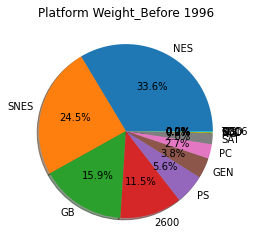

In [ ]:
#파이 차트 그리기 	Before 1996

labels = Before_1996_2['Platform']
ratio = Before_1996_2['Weight']



plt.pie(ratio, labels=labels, shadow=True, autopct='%.1f%%')
plt.title('Platform Weight_Before 1996')
plt.show()

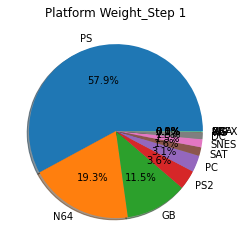

In [ ]:
#파이 차트 그리기 	Step 1

labels = Step_1_2['Platform']
ratio = Step_1_2['Weight']
plt.pie(ratio, labels=labels, shadow=True,autopct='%.1f%%')
plt.title('Platform Weight_Step 1')
plt.show()

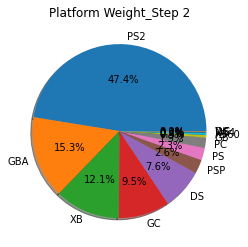

In [ ]:
#파이 차트 그리기 	Step 2

labels = Step_2_2['Platform']
ratio = Step_2_2['Weight']

plt.pie(ratio, labels=labels, shadow=True,autopct='%.1f%%')
plt.title('Platform Weight_Step 2')
plt.show()

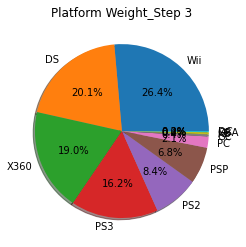

In [ ]:
#파이 차트 그리기 	Step 3

labels = Step_3_2['Platform']
ratio = Step_3_2['Weight']

plt.pie(ratio, labels=labels, shadow=True,autopct='%.1f%%')
plt.title('Platform Weight_Step 3')
plt.show()

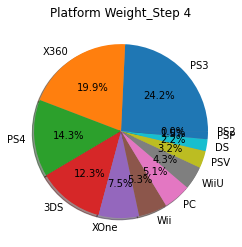

In [ ]:
#파이 차트 그리기 	Step 4

labels = Step_4_2['Platform']
ratio = Step_4_2['Weight']

plt.pie(ratio, labels=labels, shadow=True,autopct='%.1f%%')
plt.title('Platform Weight_Step 4')
plt.show()

In [ ]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함
#출고량 높은 게임에 대한 요인 분석을 다각적으로 하고 이에 대한 사유를 시각화 프로세스로 표현
#분석TOOL 선택사유, 분석결과, 이를 통해 결과 대답
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16137,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16138,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16139,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
top20=df.sort_values(by=["Total_Sales"], ascending=[False]).head(20)
top20['Rank']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
top20[['Rank','Name','Platform','Year','Genre','Publisher','Total_Sales']]

,Rank,Name,Platform,Year,Genre,Publisher,Total_Sales
2838,1,Wii Sports,Wii,2006,Sports,Nintendo,82.74
4088,2,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
12237,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83
3268,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
7626,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38
1180,6,Tetris,GB,1989,Puzzle,Nintendo,30.26
6756,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
2942,8,Wii Play,Wii,2006,Misc,Nintendo,29.01
16076,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.61
10213,10,Duck Hunt,NES,1984,Shooter,Nintendo,28.31


In [ ]:
# 전체 출고량 분석을 상위 몇개로 할지, 이상치를 제거하는 작업한 후 하자. 기존 top 으론 모델링이 안됨

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


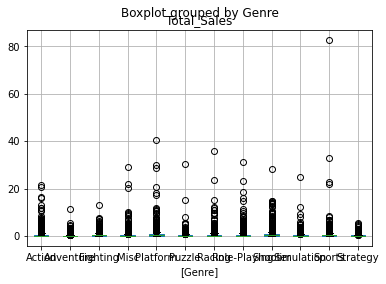

In [ ]:
#장르와의 outlier도 특이점들에 대한 분석이 어려움
no4_df=df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]

from matplotlib import pyplot as plt
no4_df.boxplot(column=["Total_Sales"],by=["Genre"])
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


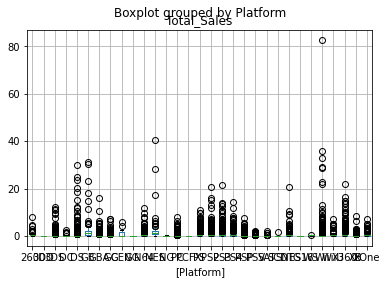

In [ ]:
#플랫폼과의 outlier도 특이점들에 대한 분석이 어려움
no5_df=df[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]

from matplotlib import pyplot as plt
no5_df.boxplot(column=["Total_Sales"],by=["Platform"])
plt.show()

In [ ]:
# Division과 장르 연관성

cross_chi2_3 = genre_trend3 [['Division', 'Genre','Total_Sales_x']]

cross_chi2_3 = pd.crosstab(cross_chi2_3['Division'], cross_chi2_3['Genre'])

p_value_chi2_3 = stats.chi2_contingency(cross_chi2_3, correction = False)[1]

if p_value_chi2_3 >= 0.05:
    print('Chi2 검정 P-value=',p_value_chi2_3,'->Division과 Genre 사이의 연관성이 존재한다.')
else:
    print('Chi2 검정 P-value=',p_value_chi2_3,'->Division과 Genre 사이의 연관성이 존재하지 않는다.')

Chi2 검정 P-value= 1.0 ->Division과 Genre 사이의 연관성이 존재한다.


In [ ]:
cross_chi2_3 

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Division,,,,,,,,,,,,
Before 1996,1,1,1,1,1,1,1,1,1,1,1,1
Step 1,1,1,1,1,1,1,1,1,1,1,1,1
Step 2,1,1,1,1,1,1,1,1,1,1,1,1
Step 3,1,1,1,1,1,1,1,1,1,1,1,1
Step 4,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#직전 3개년 Market Share _ 상위 20개 sample vs 나머지 대조

test1=top20[['Rank','Name','Platform','Year','Genre','Publisher','Total_Sales']]
test1

,Rank,Name,Platform,Year,Genre,Publisher,Total_Sales
2838,1,Wii Sports,Wii,2006,Sports,Nintendo,82.74
4088,2,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
12237,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83
3268,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
7626,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38
1180,6,Tetris,GB,1989,Puzzle,Nintendo,30.26
6756,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
2942,8,Wii Play,Wii,2006,Misc,Nintendo,29.01
16076,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.61
10213,10,Duck Hunt,NES,1984,Shooter,Nintendo,28.31


In [ ]:
genre_trend

,Year,Genre,Total_Sales,Division
0,1980,Action,0.34,Before 1996
1,1980,Fighting,0.77,Before 1996
2,1980,Misc,2.70,Before 1996
3,1980,Shooter,7.07,Before 1996
4,1981,Action,14.79,Before 1996
...,...,...,...,...
383,2016,Sports,14.46,Step 4
384,2016,Strategy,0.52,Step 4
385,2017,Action,0.01,Step 4
386,2017,Role-Playing,0.04,Step 4


In [ ]:
standard=Year_sales_sum_amend[['Year','Total_Sales']]
standard.columns = ["v_year", "v_sales"]
standard.head()

,v_year,v_sales
0,1980,10.88
1,1981,35.68
2,1982,28.88
3,1983,16.80
4,1984,50.35


In [ ]:
genre_2=genre_trend[['Year','Genre','Total_Sales']]
genre_2.columns = ["v1_year", "v1_Genre","v1_sales"]
genre_2

,v1_year,v1_Genre,v1_sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
383,2016,Sports,14.46
384,2016,Strategy,0.52
385,2017,Action,0.01
386,2017,Role-Playing,0.04


In [ ]:
standard_Genre=pd.merge(genre_2,standard,left_on='v1_year',right_on='v_year')
standard_Genre=standard_Genre[['v1_year','v1_Genre','v1_sales','v_sales']]
standard_Genre['v_weight']=round((standard_Genre['v1_sales']/standard_Genre['v_sales'])*100,1)
standard_Genre=standard_Genre[['v1_year','v1_Genre','v_weight']]
standard_Genre.columns=['Year','Genre','G_Weight']
standard_Genre

,Year,Genre,G_Weight
0,1980,Action,3.1
1,1980,Fighting,7.1
2,1980,Misc,24.8
3,1980,Shooter,65.0
4,1981,Action,41.5
...,...,...,...
383,2016,Sports,21.8
384,2016,Strategy,0.8
385,2017,Action,20.0
386,2017,Role-Playing,80.0


In [ ]:
which_Genre=standard_Genre[(standard_Genre['Year']>2013) & (standard_Genre['Year']<2017) ] #2017,18년은 1,2개의 장르 data로 100% M/S 임 빼버림
which_Genre2=which_Genre['G_Weight'].groupby(which_Genre['Genre']).mean()
which_Genre2=pd.DataFrame(data=which_Genre2)

which_Genre2

,G_Weight
Genre,
Action,28.533333
Adventure,2.533333
Fighting,4.500000
Misc,4.366667
Platform,2.700000
Puzzle,0.350000
Racing,3.466667
Role-Playing,12.600000
Shooter,22.033333


In [ ]:
which_Genre

,Year,Genre,G_Weight
350,2014,Action,29.6
351,2014,Adventure,1.8
352,2014,Fighting,4.7
353,2014,Misc,7.1
354,2014,Platform,2.7
355,2014,Puzzle,0.4
356,2014,Racing,5.0
357,2014,Role-Playing,13.7
358,2014,Shooter,19.7
359,2014,Simulation,1.7


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


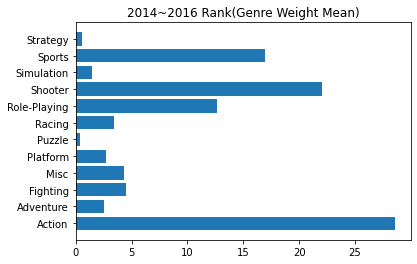

In [ ]:
plt.rc("font", family='NanumGothic')
plt.title("2014~2016 Rank(Genre Weight Mean)")
x_data=which_Genre2.index
y_data=which_Genre2['G_Weight']
plt.barh(x_data,y_data)
plt.show()

In [ ]:
Name_count=df[df['Genre']=='Action']
Name_count=Name_count[['Name','Year']]
Name_count2=Name_count['Name'].groupby(Name_count['Year']).count()
Name_count2=pd.DataFrame(data=Name_count2)
Name_count2=Name_count2.reset_index()


Name_count2_2=Name_count2.loc[1:]
Name_count2_2=Name_count2_2.reset_index()
Name_count2_2.head()

,index,Year,Name
0,1,1981,25
1,2,1982,18
2,3,1983,7
3,4,1984,1
4,5,1985,2


In [ ]:
result1 = pd.concat([Name_count2,Name_count2_2],axis=1)
result1.columns=['Year','Name_count','index','S_Year','S_Name_count']
result1['Growth Rate']=round((result1['S_Name_count']/result1['Name_count'])*100-100,1)
result1.head()

,Year,Name_count,index,S_Year,S_Name_count,Growth Rate
0,1980,1,1.0,1981.0,25.0,2400.0
1,1981,25,2.0,1982.0,18.0,-28.0
2,1982,18,3.0,1983.0,7.0,-61.1
3,1983,7,4.0,1984.0,1.0,-85.7
4,1984,1,5.0,1985.0,2.0,100.0


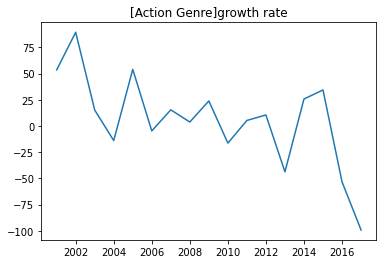

In [ ]:
x_values = result1[20:]['S_Year']
y_values = result1[20:]['Growth Rate']
plt.plot(x_values, y_values)
plt.title('[Action Genre]growth rate')
plt.show()

In [ ]:
Name_count3=df[df['Genre']=='Shooter']
Name_count3=Name_count3[['Name','Year']]
Name_count4=Name_count3['Name'].groupby(Name_count3['Year']).count()
Name_count4=pd.DataFrame(data=Name_count4)
Name_count4=Name_count4.reset_index()


Name_count4_4=Name_count4.loc[1:]
Name_count4_4=Name_count4_4.reset_index()
Name_count4_4.head()

,index,Year,Name
0,1,1981,10
1,2,1982,5
2,3,1983,1
3,4,1984,3
4,5,1985,1


In [ ]:
result2 = pd.concat([Name_count4,Name_count4_4],axis=1)
result2.columns=['Year','Name_count','index','S_Year','S_Name_count']
result2['Growth Rate']=round((result2['S_Name_count']/result2['Name_count'])*100-100,1)
result2

,Year,Name_count,index,S_Year,S_Name_count,Growth Rate
0,1980,2,1.0,1981.0,10.0,400.0
1,1981,10,2.0,1982.0,5.0,-50.0
2,1982,5,3.0,1983.0,1.0,-80.0
3,1983,1,4.0,1984.0,3.0,200.0
4,1984,3,5.0,1985.0,1.0,-66.7
5,1985,1,6.0,1986.0,4.0,300.0
6,1986,4,7.0,1987.0,2.0,-50.0
7,1987,2,8.0,1988.0,1.0,-50.0
8,1988,1,9.0,1989.0,1.0,0.0
9,1989,1,10.0,1991.0,3.0,200.0


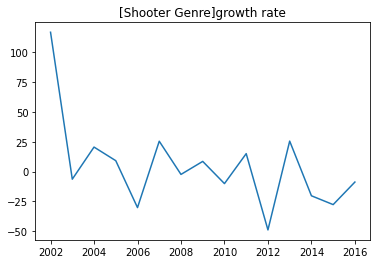

In [ ]:
x_values = result2[20:]['S_Year']
y_values = result2[20:]['Growth Rate']
plt.plot(x_values, y_values)
plt.title('[Shooter Genre]growth rate')
plt.show()

In [ ]:
Name_count5=df[df['Genre']=='Sports']
Name_count5=Name_count5[['Name','Year']]
Name_count6=Name_count5['Name'].groupby(Name_count5['Year']).count()
Name_count6=pd.DataFrame(data=Name_count6)
Name_count6=Name_count6.reset_index()


Name_count6_6=Name_count6.loc[1:]
Name_count6_6=Name_count6_6.reset_index()
Name_count6_6.head()

,index,Year,Name
0,1,1982,2
1,2,1983,1
2,3,1984,2
3,4,1985,1
4,5,1986,3


In [ ]:
result3 = pd.concat([Name_count6,Name_count6_6],axis=1)
result3.columns=['Year','Name_count','index','S_Year','S_Name_count']
result3['Growth Rate']=round((result3['S_Name_count']/result3['Name_count'])*100-100,1)
result3.head()

,Year,Name_count,index,S_Year,S_Name_count,Growth Rate
0,1981,4,1.0,1982.0,2.0,-50.0
1,1982,2,2.0,1983.0,1.0,-50.0
2,1983,1,3.0,1984.0,2.0,100.0
3,1984,2,4.0,1985.0,1.0,-50.0
4,1985,1,5.0,1986.0,3.0,200.0


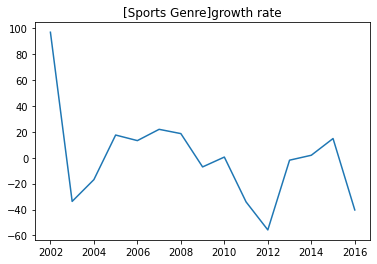

In [ ]:
x_values = result3[20:]['S_Year']
y_values = result3[20:]['Growth Rate']
plt.plot(x_values, y_values)
plt.title('[Sports Genre]growth rate')
plt.show()

In [ ]:
test2=df[['Name','Genre','Platform','Year','Total_Sales']]
test2_2=test2[test2['Genre']=='Shooter']
test2_2

,Name,Genre,Platform,Year,Total_Sales
27,World of Tanks,Shooter,PC,2011,0.29
31,Project Sylpheed: Arc of Deception,Shooter,X360,2006,0.16
43,Crysis 3,Shooter,X360,2013,0.93
59,Unreal Tournament III,Shooter,X360,2008,0.48
62,SD Gundam Force,Shooter,GBA,2004,0.01
...,...,...,...,...,...
16095,Syphon Filter 3,Shooter,PS,2001,0.52
16096,BloodRayne,Shooter,XB,2002,0.22
16097,Left 4 Dead,Shooter,X360,2008,3.51
16128,Bionicle Heroes,Shooter,DS,2006,0.06


In [ ]:
#출시작이 많은 경험

which_Platform=test2_2['Name'].groupby(test2_2['Platform']).count()
which_Platform=pd.DataFrame(data=which_Platform)
which_Platform

,Name
Platform,
2600,22
3DS,6
DC,3
DS,41
GB,1
GBA,40
GC,48
GEN,1
N64,24


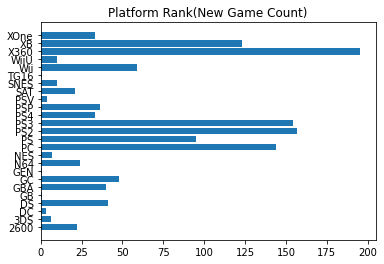

In [ ]:
plt.rc("font", family='NanumGothic')
plt.title("Platform Rank(New Game Count on 'Shooter')")
x_data=which_Platform.index
y_data=which_Platform['Name']
plt.barh(x_data,y_data)
plt.show()

In [ ]:
#Total_sales가 가장 많은 경험
which_Platform_2=test2_2['Total_Sales'].groupby(test2_2['Platform']).sum()
which_Platform_2=pd.DataFrame(data=which_Platform_2)
which_Platform_2


,Total_Sales
Platform,
2600,22.96
3DS,1.23
DC,0.33
DS,8.04
GB,1.19
GBA,3.56
GC,13.61
GEN,0.13
N64,19.26


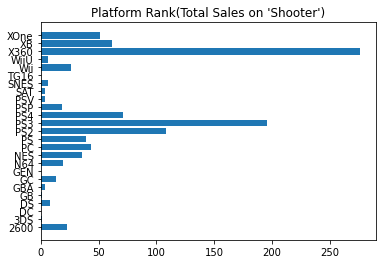

In [ ]:
plt.rc("font", family='NanumGothic')
plt.title("Platform Rank(Total Sales on 'Shooter')")
x_data=which_Platform_2.index
y_data=which_Platform_2['Total_Sales']
plt.barh(x_data,y_data)
plt.show()

In [ ]:
# X360이 2014~2016을 주도했는지 확인
final_platform=df['Total_Sales'].groupby([df['Year'],df['Platform']]).sum()
final_platform=platform_trend.reset_index()
final_platform

final_platform['Division']=np.where(final_platform['Year'] > 2014, 'Lately',0) 
f_p=final_platform[final_platform['Division']=='Lately']
f_p

,index,Year,Platform,Total_Sales,Division
220,220,2015,3DS,26.82,Lately
221,221,2015,PC,8.03,Lately
222,222,2015,PS3,18.16,Lately
223,223,2015,PS4,112.86,Lately
224,224,2015,PSP,0.12,Lately
225,225,2015,PSV,6.99,Lately
226,226,2015,Wii,1.56,Lately
227,227,2015,WiiU,16.37,Lately
228,228,2015,X360,13.02,Lately
229,229,2015,XOne,57.65,Lately


In [ ]:
which_Platform_3=f_p['Total_Sales'].groupby(f_p['Platform']).sum()
which_Platform_3=pd.DataFrame(data=which_Platform_3)
which_Platform_3=which_Platform_3.reset_index()
which_Platform_3

,Platform,Total_Sales
0,3DS,33.36
1,DS,0.29
2,PC,10.63
3,PS3,20.65
4,PS4,147.94
5,PSP,0.12
6,PSV,10.19
7,Wii,1.56
8,WiiU,19.65
9,X360,13.85


Text(0.5, 1.0, 'Total Sales by Platform after 2014 ')

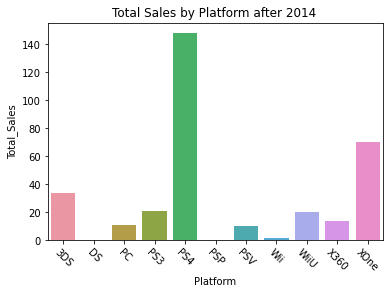

In [ ]:
import seaborn as sns
plt.xticks(rotation = - 45 )
sns.barplot(x="Platform", y="Total_Sales", data=which_Platform_3)
plt.title("Total Sales by Platform after 2014 ")